Name: Shreyas Dongre   
Roll no: 082          
Stream: CS (AI)      
Division: I                         
Semester: 5th Semester                                           
Batch: I-3            
                                                                       Date: 18/10/2022       
Subject: DL
###Assignment-10

In [58]:
import pandas as pd
df = pd.read_csv('NSE-TATAGLOBAL.csv',encoding = 'unicode_escape')

In [59]:
df.shape

(2035, 8)

In [62]:
newdf = df.iloc[60:2035,1:2]
newdf.shape

(1975, 1)

In [2]:
train_data = df.iloc[:,1:2]

In [3]:
train_data.shape

(2035, 1)

In [4]:
train_data.head

<bound method NDFrame.head of         Open
0     234.05
1     234.55
2     240.00
3     233.30
4     233.55
...      ...
2030  117.60
2031  120.10
2032  121.80
2033  120.30
2034  122.10

[2035 rows x 1 columns]>

In [5]:
#feature  normalization
train_data = train_data.values

In [6]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
train_data_scaled=scale.fit_transform(train_data)

In [7]:
#convert to timestamp of 60
import numpy as np
x_train =[]
y_train = []
for i in range (60,2035):
  x_train.append(train_data_scaled[i-60:i,0])
  y_train.append(train_data_scaled[i,0])
x_train,y_train=np.array(x_train), np.array(y_train)  

In [8]:
x_train.shape

(1975, 60)

In [9]:
#reshaping to 3D array
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [10]:
x_train.shape

(1975, 60, 1)

In [11]:
y_train.shape

(1975,)

In [12]:
#Create model
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#model.fit(x_train,y_train, epochs=10, batch_size=32)
model.fit(x_train, y_train, epochs=80,validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
62/62 [==============================] - 13s 74ms/step - loss: 0.0136 - accuracy: 0.0010
Epoch 2/10
62/62 [==============================] - 5s 78ms/step - loss: 0.0023 - accuracy: 0.0010
Epoch 3/10
62/62 [==============================] - 5s 83ms/step - loss: 0.0022 - accuracy: 0.0010
Epoch 4/10
62/62 [==============================] - 5s 73ms/step - loss: 0.0023 - accuracy: 0.0010
Epoch 5/10
62/62 [==============================] - 5s 73ms/step - loss: 0.0021 - accuracy: 0.0010
Epoch 6/10
62/62 [==============================] - 5s 73ms/step - loss: 0.0020 - accuracy: 0.0010
Epoch 7/10
62/62 [==============================] - 5s 73ms/step - loss: 0.0019 - accuracy: 0.0010
Epoch 8/10
62/62 [==============================] - 5s 73ms/step - loss: 0.0017 - accuracy: 0.0010
Epoch 9/10
62/62 [==============================] - 5s 73ms/step - loss: 0.0017 - accuracy: 0.0010
Epoch 10/10
62/62 [==============================] - 5s 73ms/step - loss: 0.0016 - accuracy: 0.0010


In [34]:
df2 = pd.read_csv('tatatest.csv',encoding = 'unicode_escape')

In [35]:
test_data = df2.iloc[:,1:2]

In [16]:
test_data.shape

(16, 1)

In [17]:
test_data.head

<bound method NDFrame.head of       Open
0   220.10
1   221.10
2   229.45
3   230.30
4   237.70
5   237.10
6   229.70
7   226.25
8   215.00
9   215.00
10  215.50
11  208.00
12  217.00
13  223.50
14  230.00
15  234.55>

In [41]:
dfx = pd.read_csv('NSE-TATAGLOBAL.csv',encoding = 'unicode_escape')
train_data = dfx.iloc[:,1:2]
train_data = pd.DataFrame(train_data)
train_data.shape

(2035, 1)

In [42]:
test_data = pd.DataFrame(test_data)
det = test_data.append(train_data)

In [43]:
det.shape

(2051, 1)

In [44]:
det = det.values

In [45]:
scale = MinMaxScaler(feature_range=(0,1))
test_data_scaled=scale.fit_transform(det)

In [46]:
#convert to timestamp of 60
x_test =[]
y_test = []
for i in range (60,2035):
  x_test.append(test_data_scaled[i-60:i,0])
  y_test.append(test_data_scaled[i,0])
x_test,y_test=np.array(x_test), np.array(y_test)

In [47]:
x_test.shape

(1975, 60)

In [48]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [49]:
x_test.shape

(1975, 60, 1)

In [53]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#model.fit(x_train,y_train, epochs=10, batch_size=32)
model.fit(x_train, y_train, epochs=80,validation_data=(x_test, y_test), verbose=1)

Epoch 1/80
62/62 [==============================] - 12s 111ms/step - loss: 0.0019 - accuracy: 0.0010 - val_loss: 9.5053e-04 - val_accuracy: 0.0010
Epoch 2/80
62/62 [==============================] - 6s 92ms/step - loss: 0.0018 - accuracy: 0.0010 - val_loss: 0.0016 - val_accuracy: 0.0010
Epoch 3/80
62/62 [==============================] - 6s 96ms/step - loss: 0.0018 - accuracy: 0.0010 - val_loss: 7.3191e-04 - val_accuracy: 0.0010
Epoch 4/80
62/62 [==============================] - 6s 91ms/step - loss: 0.0014 - accuracy: 0.0010 - val_loss: 6.6657e-04 - val_accuracy: 0.0010
Epoch 5/80
62/62 [==============================] - 6s 102ms/step - loss: 0.0012 - accuracy: 0.0010 - val_loss: 7.2084e-04 - val_accuracy: 0.0010
Epoch 6/80
62/62 [==============================] - 6s 91ms/step - loss: 0.0013 - accuracy: 0.0010 - val_loss: 6.9660e-04 - val_accuracy: 0.0010
Epoch 7/80
62/62 [==============================] - 6s 91ms/step - loss: 0.0015 - accuracy: 0.0010 - val_loss: 6.6945e-04 - val_acc

In [54]:
# make a prediction
ynew = model.predict(x_test)

62/62 [==============================] - 2s 20ms/step


In [55]:
test_inverse_predicted = scale.inverse_transform(ynew)

In [72]:
slic_data = pd.concat([df.iloc[60:2035,1:2].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted'],index=df.iloc[60:2035,1:2].index)], axis=1)

slic_data.head()

,Open,open_predicted
60,271.0,243.477600
61,262.7,243.970993
62,263.0,239.007874
63,265.1,232.242142
64,264.8,236.251160


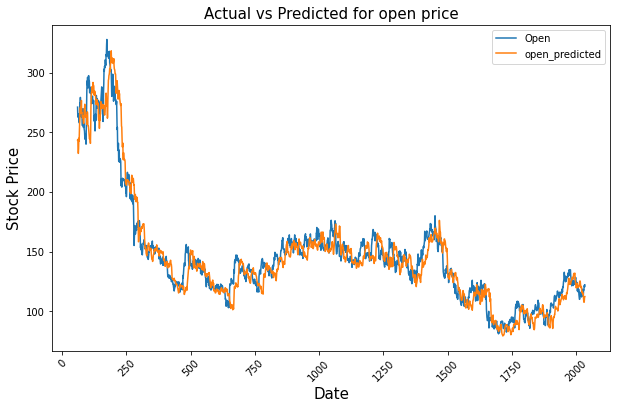

In [75]:
import matplotlib.pyplot as plt
slic_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

#Conclusion:
1) Implemented a RNN and used LSTM to predict on stock prices. The training data was low hence we got poor accuracy.                          
2) In RNNs, LSTMs are very widely used in Neural networks. Their effectiveness should be implemented to multiple sequence modelling problems in many application domains like video, NLP, geospatial, and time-series.

In [ ]:
! jupyter nbconvert --to html I082_Shreyas_Dongre_DL_Exp10.ipynb